<a href="https://colab.research.google.com/github/ML-HW-SYS/a0/blob/main/a0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Git and Drive Integration

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import time

### Mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Clone the assignment repository

In [3]:
# Clone repository in google drive
%mkdir /content/drive/MyDrive/ece5545
%cd /content/drive/MyDrive/ece5545
!git clone https://YOUR_TOKEN@github.com/ML-HW-SYS/a0-NamanMakkar.git #paste your github token here

/content/drive/MyDrive/ece5545
Cloning into 'a0-NamanMakkar'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 26 (delta 5), reused 13 (delta 3), pack-reused 0
Unpacking objects: 100% (26/26), 15.19 KiB | 68.00 KiB/s, done.


### Add `src` directory to the Python import path

In [4]:
# import functions from the src directory in repo
import sys
sys.path.insert(0, '/content/drive/MyDrive/ece5545/a0-NamanMakkar/src')

### Import functions from `src/train_utils.py`

In [5]:
import train_utils
from model import *

### Make changes to `src` files and push to repo

In [ ]:
# You will likely need to set your git user identification settings
!git config --global user.email "email"  # update with your email
!git config --global user.name "Naman Makkar"   # update with your name

In [6]:
# To run the same tests that are run on Github Classroom
%cd /content/drive/MyDrive/ece5545/a0-NamanMakkar
!python3 -m pytest

/content/drive/MyDrive/ece5545/a0-NamanMakkar
============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-3.6.4, py-1.11.0, pluggy-0.7.1
rootdir: /content/drive/MyDrive/ece5545/a0-NamanMakkar, inifile:
plugins: typeguard-2.7.1
collected 1 item                                                               

tests/test_model.py .                                                    [100%]

=========================== 1 passed in 1.57 seconds ===========================


In [ ]:
%cd /content/gdrive/MyDrive/ece5545/a0/src
# Navigate to a0/src/model.py and fix the bug (denoted by TODO)
# in the file then commit the changes below
!git commit -am "fixed bug in model.py"
!git push

## Training Configuration

In [13]:
batch_size = 256
epochs = 5
lr = 1.0
gamma = 0.7
no_cuda = False
seed = 42
log_interval = 50
save_model = False
dry_run = False

# Derived parameters
use_cuda = not no_cuda and torch.cuda.is_available()
torch.manual_seed(seed)
device = torch.device("cuda" if use_cuda else "cpu")

train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': batch_size}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                   'pin_memory': True,
                   'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

## Data Loaders and Optimizer Setup

In [14]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('/content/drive/MyDrive/ece5545/data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('/content/drive/MyDrive/ece5545/data', train=False,
                       transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

model = Net().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=lr)

scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

## Training Loop

In [15]:
import importlib
importlib.reload(train_utils)
# we use importlib to make sure that we are loading
# the latest version of train_utils after any changes
# that you may have done

for epoch in range(1, epochs + 1):
    train_utils.train(model, device, train_loader, optimizer, epoch, log_interval, dry_run)
    train_utils.test(model, device, test_loader)
    scheduler.step()

if save_model:
    torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.305827
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.346413
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.154351
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.143373
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.146503

Epoch 1 time = 12.76s on device cuda

Test set: Average loss: 0.0549, Accuracy: 9825/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.108222
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.085491
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.092485
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.080639
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.087011

Epoch 2 time = 12.11s on device cuda

Test set: Average loss: 0.0346, Accuracy: 9875/10000 (99%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.038927
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.028046
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.026389
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.053950
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.083142

Epoch 3 time = 12.92s on device cuda

Test set: Average loss: 0.03

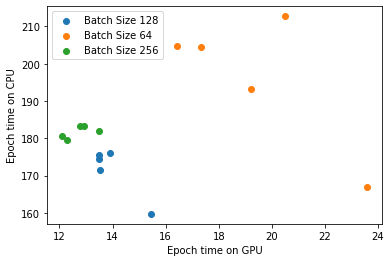

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
gpu_bs_128 = [15.45, 13.51, 13.91, 13.49, 13.47]
cpu_bs_128 = [159.73, 171.38, 176.2, 174.39, 175.4]
gpu_bs_64 = [23.58, 19.21, 16.44, 17.35, 20.51]
cpu_bs_64 = [167.01, 193.13, 204.67, 204.43, 212.74]
gpu_bs_256 = [12.76, 12.11, 12.92, 12.27, 13.47]
cpu_bs_256 = [183.39, 180.52, 183.26, 179.67, 181.88]

bs_128 = plt.scatter(gpu_bs_128, cpu_bs_128)
bs_64 = plt.scatter(gpu_bs_64, cpu_bs_64)
bs_256 = plt.scatter(gpu_bs_256, cpu_bs_256)
plt.xlabel('Epoch time on GPU')
plt.ylabel('Epoch time on CPU')
plt.legend((bs_128, bs_64, bs_256),
           ('Batch Size 128', 'Batch Size 64', 'Batch Size 256'))
plt.show()

In [17]:
# Diagnostic information about the used GPU device
!nvidia-smi

Mon Feb  6 22:48:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    33W /  70W |   1660MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------